# Q)Attribute information For bank dataset

   # Input variables:
   # bank client data:
   # 1 - age (numeric)
   # 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   # 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  # 4 - education (categorical: "unknown","secondary","primary","tertiary")
  # 5 - default: has credit in default? (binary: "yes","no")
  # 6 - balance: average yearly balance, in euros (numeric) 
  # 7 - housing: has housing loan? (binary: "yes","no")
  # 8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   # 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  # 10 - day: last contact day of the month (numeric)
  # 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  # 12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  # 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  # 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means  client was not previously contacted)
 # 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  # 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  # Output variable (desired target):
 # 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# 8. Missing Attribute Values: None

# Output variable -> y
# y -> Whether the client has subscribed a term deposit or not 
# Binomial ("yes" or "no")

In [1]:
import pandas as pd
df = pd.read_csv('bank-full.csv',sep=';')
df.value_counts()

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
18   student     single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes    1
45   management  married   tertiary   no       0        no       no    cellular   20   aug    71        2         -1     0         unknown   no     1
                 divorced  tertiary   no       54       no       yes   cellular   21   jul    34        3         -1     0         unknown   no     1
                                               220      yes      no    unknown    18   jun    89        4         -1     0         unknown   no     1
                                               335      no       no    cellular   5    aug    297       1         -1     0         unknown   no     1
                                                                                                         

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [10]:
X = df.iloc[:,:-1]
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [11]:
Y = df['y']
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [12]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [13]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X['job'] = LE.fit_transform(X['job'])
X['marital'] = LE.fit_transform(X['marital'])
X['education'] = LE.fit_transform(X['education'])
X['default'] = LE.fit_transform(X['default'])
X['housing'] = LE.fit_transform(X['housing'])
X['loan'] = LE.fit_transform(X['loan'])
X['contact'] = LE.fit_transform(X['contact'])
X['month'] = LE.fit_transform(X['month'])
X['poutcome'] = LE.fit_transform(X['poutcome'])
Y = LE.fit_transform(Y)
X
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [62]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(max_iter=100000)
lor.fit(X,Y)

LogisticRegression(max_iter=100000)

In [63]:
Y_pred = lor.predict(X)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
cm = confusion_matrix(Y,Y_pred).round(2)
acs = accuracy_score(Y,Y_pred).round(2)
rs = recall_score(Y,Y_pred).round(2)
ps = precision_score(Y,Y_pred).round(2)
fs = f1_score(Y,Y_pred).round(2)

In [65]:
cm

array([[39105,   817],
       [ 4165,  1124]], dtype=int64)

In [66]:
true_negative = cm[0][0]
true_positive = cm[1][1]
false_positive = cm[0][1]
false_negative = cm[1][0]
def specificity(true_negative,false_positive):
    return (true_negative/true_negative+false_positive)
specificity(true_negative,false_positive)

818.0

In [67]:
acs

0.89

In [68]:
rs

0.21

In [69]:
ps

0.58

In [70]:
fs

0.31

In [83]:
pred_probability = lor.predict_proba(X)[:,1]
print(pred_probability)
print(len(pred_probability))
from sklearn.metrics import roc_curve,roc_auc_score
FPR,TPR,_ = roc_curve(Y,pred_probability)

[0.01833509 0.01171369 0.00751313 ... 0.78961051 0.14326902 0.5876773 ]
45211


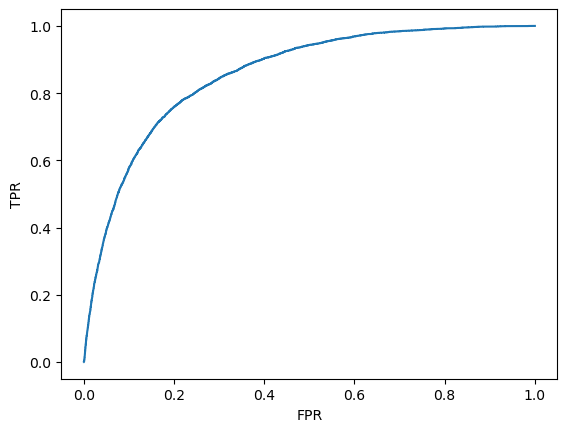

In [84]:
import matplotlib.pyplot as plt
plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [85]:
auc = roc_auc_score(Y,pred_probability)
auc

0.8561319265325941